<a href="https://colab.research.google.com/github/Aicoaching2025/Linear-Regression/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from IPython.display import display

# Generate sample data
num_records = 100  # Adjust the number of records

data = {
    "score": np.random.randint(50, 100, num_records),  # Random scores between 50 and 100
    "completed": np.random.randint(1, 10, num_records),  # Random lessons between 1 and 10
    "Lesson_Type": np.random.choice(["A", "B"], num_records)  # Randomly assign A or B
}

# Create DataFrame
df = pd.DataFrame(data)

# Display dataset
# Assuming 'display_dataframe_to_user' is a standalone function, call it directly
# If it's part of a module, import the module and then call the function
# For example, if it's in a module named 'my_tools':
# import my_tools
# my_tools.display_dataframe_to_user(name="Score_Lessons_Dataset", dataframe=df)

# For now, simply display the dataframe using pandas' display function
display(df.head())

,score,completed,Lesson_Type
0,68,5,A
1,83,8,B
2,99,2,B
3,50,5,A
4,93,3,A


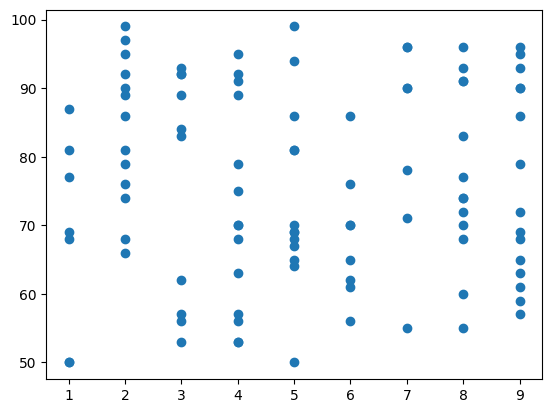

Intercept    75.55250
completed     0.04375
dtype: float64


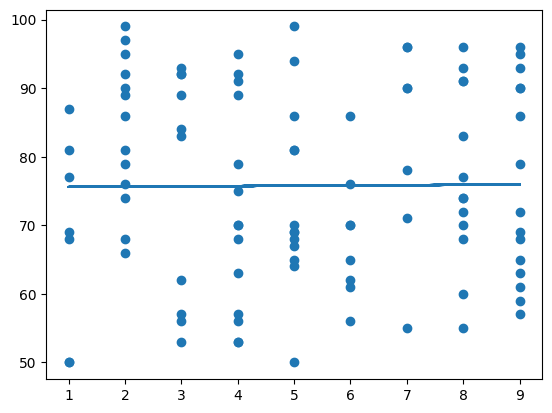

predicted score for learner who has completed 20 prior lessons:  0    76.4275
dtype: float64


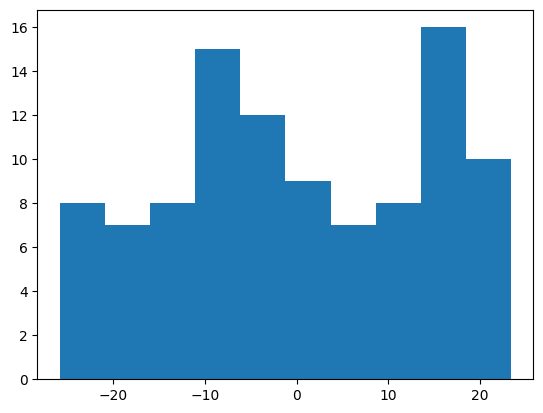

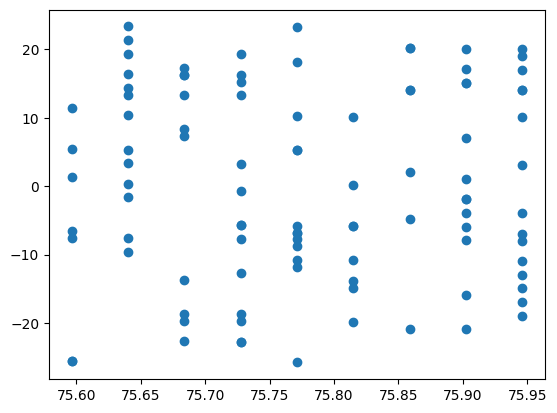

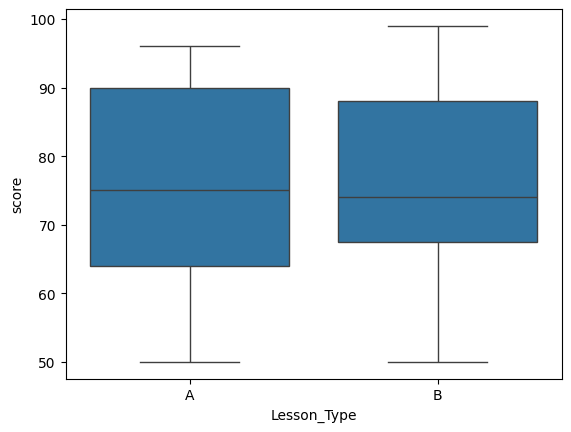

<Figure size 640x480 with 0 Axes>

In [19]:
# Create a scatter plot of score vs completed
plt.scatter(df['completed'], df['score'])  # Use df to access columns

# Show then clear plot
plt.show()
plt.clf()

# Fit a linear regression to predict score based on prior lessons completed
model = sm.OLS.from_formula('score ~ completed', df) # Pass df to from_formula
results = model.fit()
print(results.params)

# Intercept interpretation:
# A learner who has previously completed 0 content items is expected to earn a quiz score of 13.2 points.

# Slope interpretation:
# Students who have completed one additional prior content item are expected to score 1.3 points higher on the quiz.

# Plot the scatter plot with the line on top
plt.scatter(df.completed, df.score) # Use df to access columns
plt.plot(df.completed, results.predict(df)) # Pass df to predict

# Show then clear plot
plt.show()
plt.clf()

# Predict score for learner who has completed 20 prior lessons
pred20 = results.params.iloc[0] + results.params.iloc[1]*20
#OR
newdata = {'completed':[20]}
pred20 = results.predict(newdata)
print('predicted score for learner who has completed 20 prior lessons: ', pred20)

# Calculate fitted values
fitted_values = results.predict(df) # Pass df to predict

# Calculate residuals
residuals = df.score - fitted_values # Use df to access score column

# Check normality assumption
plt.hist(residuals)

# Show then clear the plot
plt.show()
plt.clf()

# Check homoscedasticity assumption
plt.scatter(fitted_values, residuals)

# Show then clear the plot
plt.show()
plt.clf()

# Create a boxplot of score vs lesson
sns.boxplot(x = 'Lesson_Type', y = 'score', data = df) # Change 'lesson' to 'Lesson_Type' and pass df

# Show then clear plot
plt.show()
plt.clf()